In [1]:
!pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import scikitplot as skplt

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix

In [5]:
bank_df = pd.read_csv("BankChurners.csv")
bank_df.drop(columns = bank_df.columns[-2:], inplace=True)
bank_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [28]:
bank_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### One Hot Encoder

In [7]:
def one_hot_apply(df: pd.core.frame.DataFrame, features:list):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    
    for feature in features:
        reshaped_data = df[feature].values.reshape(len(df[feature]),1)
        
        categorys = np.sort(df[feature].unique())
        categorys = [feature + "_" + c for c in categorys]
        encoded_feature = pd.DataFrame(encoder.fit_transform(reshaped_data), columns=categorys)
        
        df.drop(columns=[feature], inplace=True)
        df = pd.concat([df,encoded_feature], axis=1)
        
    return df

In [8]:
encoded_df = one_hot_apply(bank_df, ['Gender', 'Education_Level',
       'Marital_Status', 'Income_Category'])

## Classificação

Nessa seção, o objetivo é classificar se um cliente vai fechar a conta em algum espaço de tempo, ou se permanecerá com a conta aberta

In [9]:
customer_class = []
i = 0
for _,row in encoded_df[["Attrition_Flag","Months_on_book"]].iterrows():
    if row["Attrition_Flag"] == "Existing Customer":
        i = 0
    else:
        i = 2
        
    if row["Months_on_book"] <= 36:
        i += 0
    elif row["Months_on_book"] <= 56:
        i += 1
    customer_class.append(i) 

In [10]:
encoded_df["Customer_Class"] = customer_class

In [11]:
encoded_df["Customer_Class"].value_counts()

0    5268
1    3232
2     997
3     630
Name: Customer_Class, dtype: int64

In [12]:
encoded_df.drop(columns=["CLIENTNUM", "Attrition_Flag", "Months_on_book", "Card_Category"], inplace=True)
encoded_df

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Customer_Class
0,45,3,5,1,3,12691.0,777,11914.0,1.335,1144,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,49,5,6,1,2,8256.0,864,7392.0,1.541,1291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,51,3,4,1,0,3418.0,0,3418.0,2.594,1887,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,40,4,3,4,1,3313.0,2517,796.0,1.405,1171,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,40,3,5,1,0,4716.0,0,4716.0,2.175,816,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,3,2,3,4003.0,1851,2152.0,0.703,15476,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
10123,41,2,4,2,3,4277.0,2186,2091.0,0.804,8764,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
10124,44,1,5,3,4,5409.0,0,5409.0,0.819,10291,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
10125,30,2,4,3,3,5281.0,0,5281.0,0.535,8395,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2


In [13]:
X = encoded_df.drop(columns=['Customer_Class'])
y = encoded_df['Customer_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def best_estimator(cls, params, cv=5):
    pipe = Pipeline(steps=[('scale', StandardScaler()), 
                           ('var', VarianceThreshold()),
                           ('cls', cls)])
    gs = GridSearchCV(estimator=pipe, 
                  param_grid=params,
                  cv=cv,
                  n_jobs=5)
    
    gs.fit(X_train, y_train)
    return gs

In [14]:
param_range = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
lr_param = {
            'cls__fit_intercept' : [True, False],
            'cls__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'cls__C' : param_range
}

'''svc_param = {
            'cls__C' : param_range,
            'cls__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'cls__degree': [_ for _ in range (3, 8)],
            'cls__decision_function_shape' : ['ovo', 'ovr']
}'''

gnb_param = {
            'cls__var_smoothing' : [10**-9]
}

knn_param = {
            'cls__n_neighbors' : [_ for _ in range(2,11)],
            'cls__weights' : ['uniform', 'distance'],
            'cls__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

rf_param = {
            'cls__n_estimators' : [_ for _ in range(5, 20, 5)],
            'cls__criterion' : ['gini', 'entropy'],
            'cls__max_depth' : [_ for _ in range(2, 11, 2)],
            'cls__min_samples_split' : [_ for _ in range(2,6)],
            'cls__min_samples_leaf' : [_ for _ in range(1, 5)],
            'cls__max_features' : ['auto', 'sqrt', 'log2']
}

In [15]:
models = [(LogisticRegression(), lr_param), #(SVC(), svc_param), 
          (GaussianNB(), gnb_param), (KNeighborsClassifier(), knn_param), 
          (RandomForestClassifier(), rf_param)]

for model in models:
    model[1]['var__threshold'] = np.linspace(0, 0.2, 5)

In [16]:
models_gs = []

for model in models:
    print(model[0])
    pipe = model[0]
    params = model[1]
    models_gs.append(best_estimator(pipe, params))

LogisticRegression()
GaussianNB()
KNeighborsClassifier()
RandomForestClassifier()


## Logistic Regression

### Melhores hiperparâmetros

In [17]:
models_gs[0].best_params_

{'cls__C': 10.0,
 'cls__fit_intercept': True,
 'cls__solver': 'sag',
 'var__threshold': 0.15000000000000002}

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

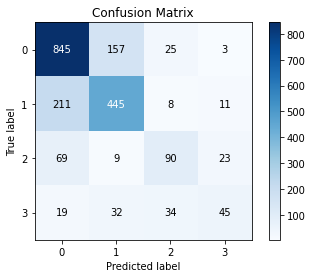

In [18]:
lr = models_gs[0]
lr.best_estimator_.fit(X_train, y_train)
lr_pred = lr.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, lr_pred)

## Gaussian Naive Bayes

### Melhores hiperparâmetros

In [19]:
models_gs[1].best_params_

{'cls__var_smoothing': 1e-09, 'var__threshold': 0.0}

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

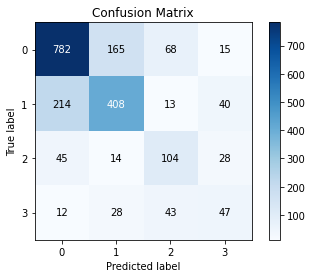

In [20]:
gnb = models_gs[1]
gnb.best_estimator_.fit(X_train, y_train)
gnb_pred = gnb.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, gnb_pred)

## KNN

### Melhores hiperparâmetros

In [21]:
models_gs[2].best_params_

{'cls__algorithm': 'auto',
 'cls__n_neighbors': 10,
 'cls__weights': 'distance',
 'var__threshold': 0.0}

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

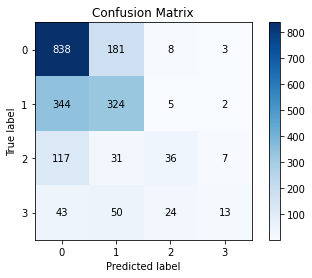

In [22]:
knn = models_gs[2]
knn.best_estimator_.fit(X_train, y_train)
knn_pred = knn.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, knn_pred)

## Random Forest

### Melhores hiperparâmetros

In [23]:
models_gs[3].best_params_

{'cls__criterion': 'gini',
 'cls__max_depth': 10,
 'cls__max_features': 'log2',
 'cls__min_samples_leaf': 2,
 'cls__min_samples_split': 3,
 'cls__n_estimators': 15,
 'var__threshold': 0.15000000000000002}

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

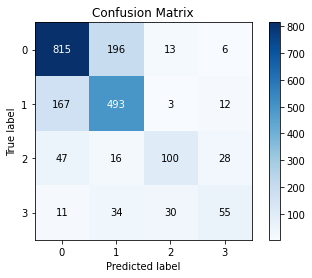

In [24]:
rf = models_gs[3]
rf.best_estimator_.fit(X_train, y_train)
rf_pred = rf.best_estimator_.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, rf_pred)

## Métricas

In [25]:
metrics_df = pd.DataFrame(None)
estimators = ['Regressão Logística', 'Naive Bayes Gaussiano','KNN', 'Random Forest']
predictions = [lr_pred, knn_pred, rf_pred, gnb_pred]

i = 0
for pred in predictions:
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="weighted")
    recall = recall_score(y_test, pred, average="weighted")
    f1 = f1_score(y_test, pred, average="weighted")

    row = pd.DataFrame([estimators[i], accuracy, precision, recall, f1]).T
    metrics_df = pd.concat([metrics_df, row], ignore_index=True)
    i += 1

metrics_df.columns = ['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_df.set_index('Modelo')

,Accuracy,Precision,Recall,F1-score
Modelo,,,,
Regressão Logística,0.703356,0.695347,0.703356,0.696188
Naive Bayes Gaussiano,0.59773,0.581527,0.59773,0.5669
KNN,0.722113,0.720179,0.722113,0.719154
Random Forest,0.661895,0.664781,0.661895,0.662467
